# Kényszerkielégítés

---


**Általános keresési probláma**
* Az állapot egy fekete doboz
* Az állaptot bármilyen adatstruktúra ábrázolja
* Csak az állapotátmenete, heurisztika és célállapot legyen implementálva

**Kényszerkielégítés probláma**
* Az állapott D<sub>i</sub> tartományból származó X<sub>i</sub> változókkal definiáljuk
* A célteszt kényszer halmza, mely mindegyike a változó egy részhalmazát és megfelelő értékeket tartalmaz
  



In [114]:
#minden sor egy cúcs
# minden oszlop az hogy ki a neki szomszédja

graph = [
    [0,1,1,0,0,0],
    [1,0,1,1,1,1],
    [1,1,0,1,1,1],
    [0,1,1,0,1,0],
    [0,1,1,1,0,1],
    [0,1,1,0,1,0]
    ]


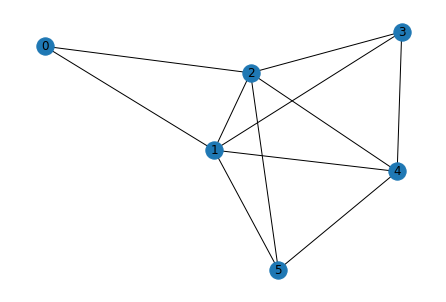

In [115]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in range(len(graph)):
    for j in range(i+1, len(graph)):
        if graph[i][j]:
            G.add_edge(i,j)


pos  = nx.spring_layout(G)
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [116]:
def is_safe(graph, color, v, c):
    for i in range(len(graph)):
        if graph[v][i] and c == color[i]:
            return False
    return True

In [117]:
def backtracking(graph, graph_colors, v, colors):
    """Ha nem tudunk kövi állapotot rakni akkor az előzőt máshogy rakjuk stb..."""

    if v == len(graph):
        return True

    for c in range(colors):

        if is_safe(graph, graph_colors, v, c):

            # v csúcs c szinnel
            graph_colors[v] = c

            # megprobaljuk kiszenezni a kövi csucsot
            if backtracking(graph, graph_colors, v+1, colors):
                return True

            graph_colors[v] = -1
    return False


In [118]:
def graph_coloring(graph, colors):

    n = len(graph)

    graph_colors = [-1]*n
    graph_colors[0] = 0

    if not backtracking(graph, graph_colors, 0, colors):
        return None

    return graph_colors


In [119]:

colors = 4

grap_colors = graph_coloring(graph, colors)
print("Szinek: ", grap_colors)


Szinek:  [0, 1, 2, 0, 3, 0]


In [120]:
def is_sage_csp(graph, colors):

    for i in range(len(graph)):
        for j in range(i+1, len(graph)):
            if graph[i][j] and colors[i] == colors[j]:
                return False
    return True

In [121]:
def graph_coloring_csp(graph, colors, v, graph_colors):
    if v == len(graph):

        if is_sage_csp(graph, grap_colors):
            print(graph_colors)
            return True
        
        else:
            return False
    for i in range(colors):
        grap_colors[v] = i
        if graph_coloring_csp(graph, colors, v+1, graph_colors):
            return True
        graph_colors[v] = -1
        


In [122]:
colors = 4
grap_colors = [-1]*len(graph)
graph_coloring_csp(graph,colors, 0,grap_colors)

IndexError: list assignment index out of range